# رویکرد مناسبی نبود

# Classification Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline


#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.linear_model import LogisticRegression


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

### PreProcess


#### Clean and Engeering Data

In [2]:
X_train = pd.read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Training_Data')
X_test = pd .read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Test_Data')


#### Clean and Engeering Data

X_test=X_test.drop(['Attribute Information:'],axis=1)

y_train = X_train[' UNS']
X_train = X_train.drop([' UNS'], axis=1)


y_test = X_test[' UNS']
X_test =X_test.drop([' UNS','Unnamed: 6','Unnamed: 7'],axis=1)

X_train.info()

X_train

#OK

X_test.info()


#OK

y_test.value_counts()

y_train.value_counts()

y_train.value_counts()

#need to map
vTs={
    'Very Low':0,
    'very_low':0,
    'Low':1,
    'Middle':2,
    'High':3
}
y_train = y_train.map(vTs)

y_test.value_counts()

#need map
y_test = y_test.map(vTs)

#df['Output']= df['Output'].map({'N':1,'O':0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
dtypes: float64(5)
memory usage: 10.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     145 non-null    float64
 1   SCG     145 non-null    float64
 2   STR     145 non-null    float64
 3   LPR     145 non-null    float64
 4   PEG     145 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


### Model

#### Create Model(s)

In [3]:
log = LogisticRegression()

In [4]:
pipe = Pipeline([('log',log)])

In [5]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [6]:
#hyper param value
penalty = ['l2']
solver = ['liblinear','saga']
multi_class = ['multinomial']


In [7]:
hyp_param ={
    'log__penalty':penalty,
    'log__solver':solver,
    'log__multi_class':multi_class,
}

In [8]:
full_model = GridSearchCV(estimator=pipe , param_grid=hyp_param,cv=5, verbose=2)

#### Train Model

In [15]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('log', LogisticRegression())])

### Evaluate model

In [16]:
y_pred = pipe.predict(X_test)

#### Test On data

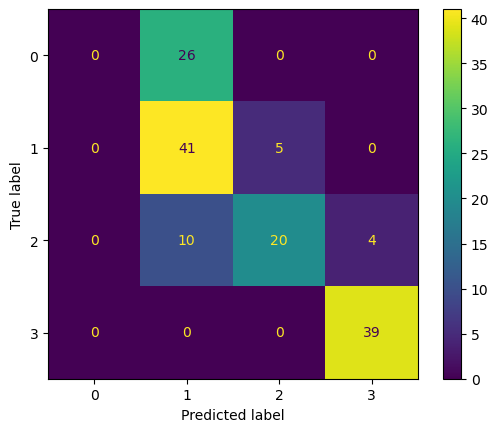

In [17]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred)
                       ,display_labels=full_model.classes_).plot()

In [18]:
print(classification_report(y_pred=y_pred,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.53      0.89      0.67        46
           2       0.80      0.59      0.68        34
           3       0.91      1.00      0.95        39

    accuracy                           0.69       145
   macro avg       0.56      0.62      0.57       145
weighted avg       0.60      0.69      0.63       145



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
full_model.best_params_

{'log__multi_class': 'multinomial',
 'log__penalty': 'l2',
 'log__solver': 'saga'}

### Final Model(s)


#### Train on all Data 

#### Save with joblib

X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

final_model = SVC(decision_function_shape='ovo',degree=2,gamma='scale',kernel='poly')
final_model.fit(X,y)

import joblib
joblib.dump(value=full_model,filename=filename)

# Congratulations!!!

#### Created and trained by  Matin1099.
